In [1]:
import numpy as np
from lab_mf_toolbox.Multifractal_tools_box_Python_HMCo_ENPC_v_0_93 import TM
from parsivel.read_write import pars_read_from_pickle
from multifractal_analysis.general import closest_power_of_2, slice_power_of_2
from multifractal_analysis.trace_moment import get_um_params_tm
from pandas import DataFrame
from pathlib import Path
data_folder = Path("/home/debian-mmss/stage_project/data/saved_events/pars_events")

In [2]:
##function for finding nearest power of 2
def floor_log(num, base):
    if num < 0:
        raise ValueError("Non-negative number only.")
    if num == 0:
        return 0
    return base ** int(np.log(num, base))

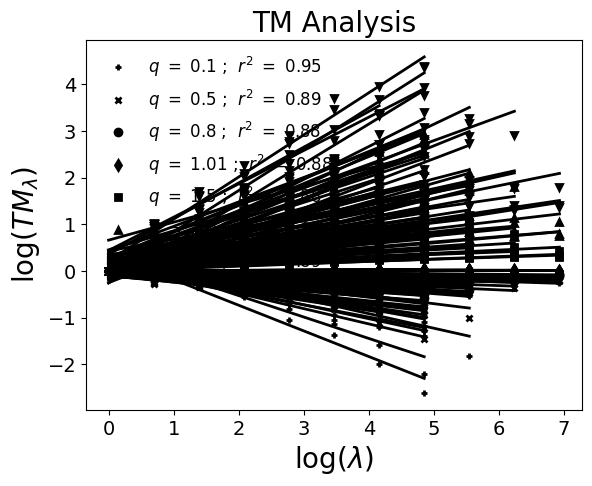

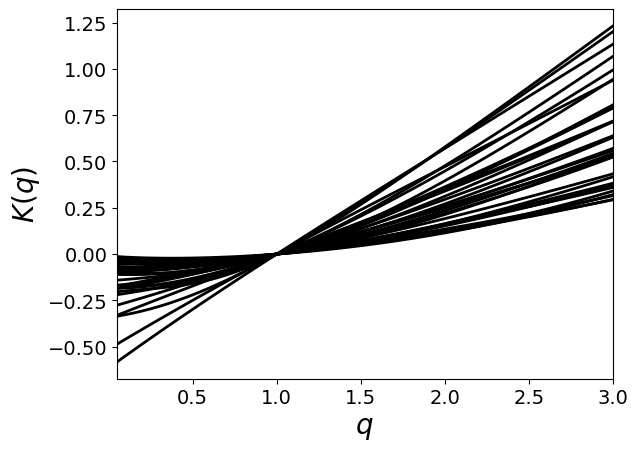

In [3]:
results = []
for file in data_folder.iterdir():
    pars_event = pars_read_from_pickle(file)
    R_data_all = pars_event.rain_rate
    N_org = len(R_data_all)
    edata = R_data_all
    data_name = "first"
    N = closest_power_of_2(edata.size)
    edata = np.nan_to_num(R_data_all)
    # N fitting with data - N with max cumulative value
    ##script that reshapes data to power of 2 based on maximum cumulative rainfall rate
    data = slice_power_of_2(edata)
    ###changing nan (not a number) to zero
    data = np.nan_to_num(data)

    ##Normailizing data
    data = data / np.nanmean(data)
    data = data.reshape((-1,1))

    ##TM analysis
    dim = 1
    data_file_name = ""
    l_range = [(1, N)]
    file_index = 0
    q_values = np.array([-1])
    file_name = "TM_test_truc.npy"
    plot_index = 5
    Kq_1, Kq_2, Kq_3, r2_1, r2_2, r2_3 = TM(
        data, q_values, data_file_name, dim, l_range, file_index, file_name, plot_index
    )
    ##first scaling regime
    R2_TM = r2_1[25]
    C1_TM = (Kq_1[21] - Kq_1[17]) / 0.2
    alpha_TM = (Kq_1[21] + Kq_1[17]) / (0.1 * 0.1 * C1_TM)

    # My code
    alpha, c1 = get_um_params_tm(data.flatten())
    results.append((file.name, alpha_TM, C1_TM, alpha, c1))
results = DataFrame(results, columns=["name", "alpha_1", "c1_1","alpha_2", "c1_2"])